In [1]:
import torch
from torch import nn
from torch import optim

In [3]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [4]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [5]:
for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8413]], requires_grad=True), Parameter containing:
tensor([0.3273], requires_grad=True)], Cost : 1.511
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8555]], requires_grad=True), Parameter containing:
tensor([0.0390], requires_grad=True)], Cost : 1.426
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8644]], requires_grad=True), Parameter containing:
tensor([-0.1404], requires_grad=True)], Cost : 1.393
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8698]], requires_grad=True), Parameter containing:
tensor([-0.2520], requires_grad=True)], Cost : 1.380
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8733]], requires_grad=True), Parameter containing:
tensor([-0.3215], requires_grad=True)], Cost : 1.375
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8754]], requires_grad=True), Parameter containing:
tensor([-0.3647], requires_grad=True)], Cost : 1.373
Epoch : 7000, Model : [Parameter containin

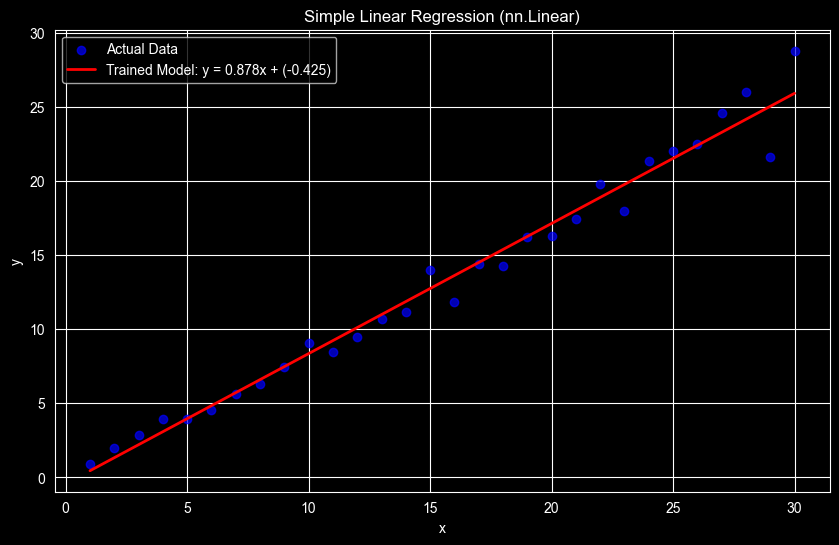

In [9]:
import matplotlib.pyplot as plt

# Prediction after training
with torch.no_grad():
    pred = model(x)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x.numpy(), y.numpy(), label='Actual Data', alpha=0.7, color='blue')
plt.plot(x.numpy(), pred.numpy(), 'r-', linewidth=2, label=f'Trained Model: y = {model.weight.item():.3f}x + ({model.bias.item():.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression (nn.Linear)')
plt.legend()
plt.grid(True)
plt.show()